# Dry Beans Models Project Notebook (Team 14)
##### Follow the steps in the README.md file to create and activate the virtual environment before running notebook cells

# Imports (Some imports may happen in later cells)

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split

from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
from sklearn.tree import (DecisionTreeClassifier as DTC, # Decision Tree for Classification
                          DecisionTreeRegressor as DTR, # Decision Tree for Regression
                          plot_tree, # Package for plotting trees
                          export_text)

from sklearn.ensemble import (RandomForestClassifier as RFC, # Random Forest for Classification
                              RandomForestRegressor as RFR, # Random Forest for Regression
                              GradientBoostingClassifier as GBC, # Boosting for Classification
                              GradientBoostingRegressor as GBR) # Boosting for Regression

from sklearn.metrics import (accuracy_score, # Method for finding Accuracy
                             confusion_matrix,
                             silhouette_score,
                             log_loss) # Method for finding the loss (log scale)

# Data pre-processing

In [23]:
# This cell converts our raw data file from .xlsx to .csv using pandas

# Load the xlsx file into a DataFrame
df = pd.read_excel('../raw_data/Dry_Bean_Dataset.xlsx')

# Save the DataFrame to a csv file
df.to_csv('../raw_data/Dry_Bean_Dataset.csv', index=False)

/Users/emery/Documents/GitHub/Dry_Beans_Models/venv/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/Users/emery/Documents/GitHub/Dry_Beans_Models/venv/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [24]:
# Load the dataset
file_path = '../raw_data/Dry_Bean_Dataset.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [25]:
# Step 2: Exploratory Data Analysis (EDA)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13609 non-null  float64
 7   EquivDiameter    13610 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13608 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13610 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13610 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [26]:
print(data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13609.000000   
mean    53045.707369    855.283459       327.472588       202.272945   
std     29327.215648    214.289696       858.688485        44.973009   
min         9.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.313410       175.842829   
50%     44652.000000    794.941000       296.899313       192.437870   
75%     61332.000000    977.213000       376.504333       217.033886   
max    254616.000000   1985.370000    100000.000000       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13608.000000  13611.000000   13609.000000   13610.000000  13608.000000   
mean       1.583332      0.751585   53768.745536     253.068138      0.749728   
std        0.246631      0.121440   29779.126018      59.177529      0.049090   
min        1.024868      0.

In [55]:
# Calculate the count of each target variable
count = data['Class'].value_counts()
print(count)

DERMASON    3546
SIRA        2636
SEKER       2011
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [27]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    2
AspectRation       3
Eccentricity       0
ConvexArea         2
EquivDiameter      1
Extent             3
Solidity           3
roundness          0
Compactness        0
ShapeFactor1       1
ShapeFactor2       1
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64


In [43]:
print("Original size:", data.shape)

# Remove rows with any missing values
data = data.dropna()

print("Size after removing rows with missing values:", data.shape)

# Display the first few rows of the cleaned dataset
print(data.head())

Original size: (13611, 17)
Size after removing rows with missing values: (13595, 17)
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFact

In [44]:
# Check if the data is now clean
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [45]:
# Check for categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
Index(['Class'], dtype='object')


In [46]:
# Check for numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Features:")
print(numeric_features)

Numeric Features:
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


In [47]:
# Step 3: Supervised Learning
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9216623758734829


In [49]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9293858036042663


In [50]:
# Step 4: Unsupervised Learning
# K-Means Clustering
kmeans = KMeans(n_clusters=len(data['Class'].unique()), n_init=10)  # Explicitly set n_init
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

In [51]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=len(data['Class'].unique()))
data['HierarchicalCluster'] = hierarchical.fit_predict(X)

In [52]:
# Apriori Algorithm (Association Rule Mining)

# Assuming we convert the continuous attributes into discrete bins for the Apriori algorithm
data_bins = pd.DataFrame()
for column in X.columns:
    data_bins[column] = pd.cut(X[column], bins=5, labels=np.arange(5))

# Convert to binary format
data_binary = pd.get_dummies(data_bins, prefix='', prefix_sep='')

frequent_itemsets = apriori(data_binary, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Apriori Rules:")
print(rules)

/Users/emery/Documents/GitHub/Dry_Beans_Models/venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Rules:
    antecedents   consequents  antecedent support  consequent support  \
0           (1)           (0)            0.105480            0.117102   
1           (0)           (1)            0.117102            0.105480   
2           (0)           (2)            0.117102            0.163222   
3           (2)           (0)            0.163222            0.117102   
4           (0)           (3)            0.117102            0.103788   
..          ...           ...                 ...                 ...   
158      (0, 2)     (4, 1, 3)            0.132402            0.130195   
159         (1)  (4, 2, 0, 3)            0.105480            0.105627   
160         (3)  (4, 1, 0, 2)            0.103788            0.104377   
161         (0)  (4, 1, 2, 3)            0.117102            0.100625   
162         (2)  (4, 1, 0, 3)            0.163222            0.126370   

      support  confidence      lift  leverage  conviction  zhangs_metric  
0    0.105480    1.000000  8.5395

In [53]:
# Step 5: Model Evaluation
# Supervised Learning Evaluation
print("Supervised Learning Model Evaluation:")
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Confusion Matrix - KNN:")
print(confusion_matrix(y_test, y_pred_knn))

# Unsupervised Learning Evaluation
print("Unsupervised Learning Model Evaluation:")
print("K-Means Clustering - Cluster Counts:")
print(data['Cluster'].value_counts())
print("Hierarchical Clustering - Cluster Counts:")
print(data['HierarchicalCluster'].value_counts())

Supervised Learning Model Evaluation:
Confusion Matrix - Logistic Regression:
[[245   0  10   0   1   1  12]
 [  0 118   0   0   0   0   0]
 [ 10   0 303   0   1   1   3]
 [  0   0   0 621   2  14  47]
 [  0   0  11   3 357   0   5]
 [  5   0   0   7   0 382  13]
 [  1   0   1  45  13   7 480]]
Confusion Matrix - KNN:
[[247   0  13   1   1   0   7]
 [  0 118   0   0   0   0   0]
 [  8   0 304   0   2   0   4]
 [  0   0   0 633   2  12  37]
 [  0   0   6   2 363   0   5]
 [  2   0   0  13   0 380  12]
 [  2   0   1  48   8   6 482]]
Unsupervised Learning Model Evaluation:
K-Means Clustering - Cluster Counts:
6    4266
0    3353
3    2508
2    1912
5    1036
1     303
4     217
Name: Cluster, dtype: int64
Hierarchical Clustering - Cluster Counts:
0    4802
1    4613
5    1458
6    1223
4     979
3     335
2     185
Name: HierarchicalCluster, dtype: int64


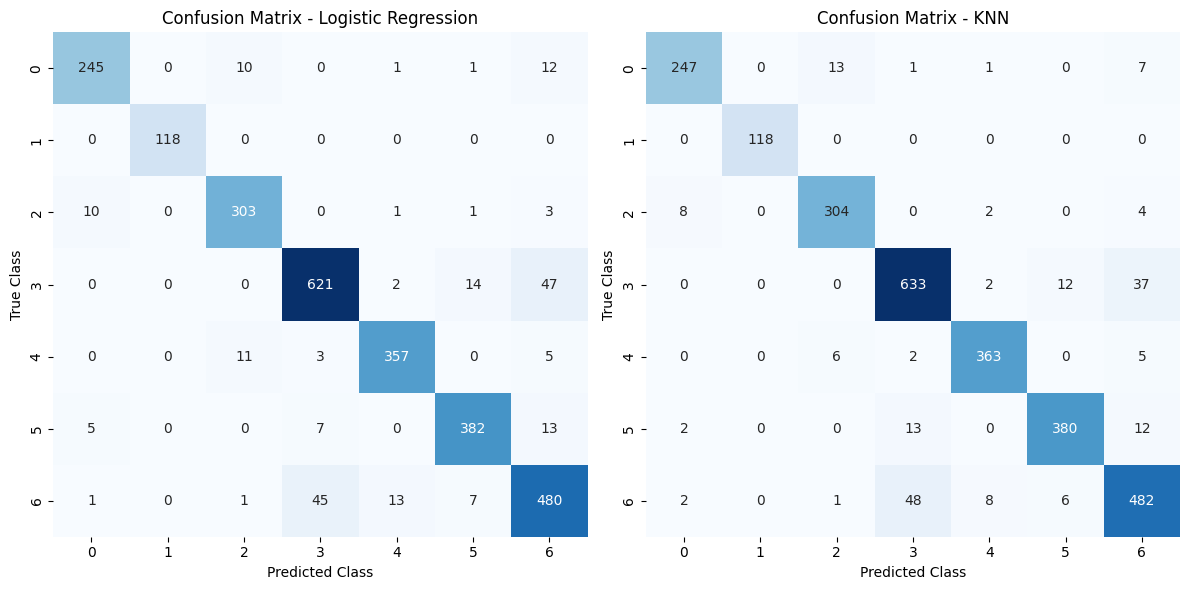

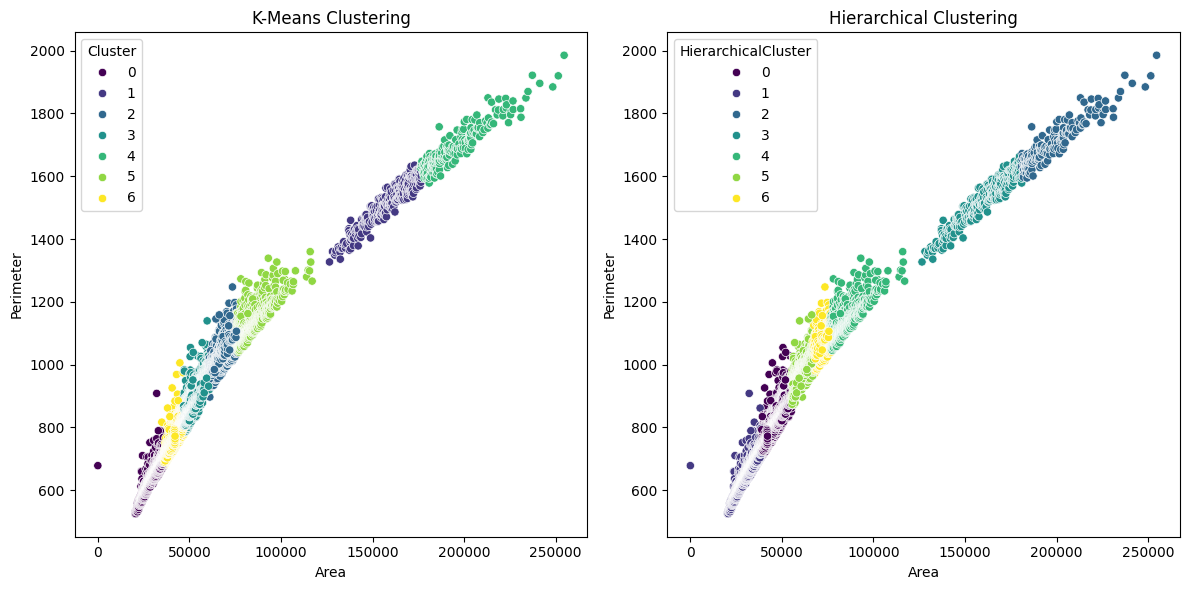

In [54]:
# Plotting Confusion Matrices for Supervised Learning
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.tight_layout()
plt.show()

# Plotting Scatter Plots for Unsupervised Learning
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Area', y='Perimeter', hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Area', y='Perimeter', hue='HierarchicalCluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')

plt.tight_layout()
plt.show()